## China loan EDA

dicriptions of columns:
1. COUNTRY: name of countries (which the borrower of China) exist (like Angola,SriLanka,Ethiopia, Kenya, ...) 
2. SECTOR:  the reason Companies/organization borrowed (like for transport, power,..)
3. BORROWER: the company/organization that borrowed from China (like Government,Petrobras,..)
4. LENDER: organizations that give loan for borrowers (like CDB,ExlBank)
5. AMOUNT: the amount borrower lent.
6. year: it specifies when they borrowed.
7. Expand All | Collapse All: name of project
8. SENSITIVE TERRITORY OVERLAP: theriotory relationship with the borrower's country.

to get some insight, I applied different methods:
1. grouping the data based on country, year
2. transformation (especially for AMOUNT column)

importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

loading the datasets

In [2]:
df=pd.read_csv('china_dept_trap.csv')
df.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


looking the columns' dtype and not_null count

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Expand All | Collapse All    858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.8+ KB


In [12]:
df.shape

(858, 8)

In [13]:
df.columns

Index(['Expand All | Collapse All', 'YEAR', 'AMOUNT', 'LENDER', 'BORROWER',
       'SECTOR', 'SENSITIVE TERRITORY OVERLAP', 'Country'],
      dtype='object')

#### dealing with missing values

In [14]:
df.isnull().sum()

Expand All | Collapse All      0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       1
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

In [15]:
miss=0
for i in df.columns:
    if df[i].isnull().sum()>0:
        miss+=1
        print('{} has {} missing values'.format(i,df[i].isnull().sum()))
print('\n {} features have missing values'.format(miss))

BORROWER has 1 missing values

 1 features have missing values


In [16]:
df[df['BORROWER'].isnull()]

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
802,Unspecified,2009,$500M,ExImBank,NaN,Mulit-sector/discretionary,None Known,Venezuela


to fill missing value sometimes it needs some explaration about the data. (domain knowledge)
1. we have to check mode for the country
2. we will consider other's column

In [17]:
Venezuela_df=df[df['Country']=='Venezuela'] # creating dataframe that stores only about venezuela because the missing value in Venezuela

In [18]:
Venezuela_df

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
188,CVG (mining),2009,$1000M,CDB,Corporacion Venezolana de Guayana (CVG),"Extraction, pipelines",Within Critical Habitats,Venezuela
212,Discretionary,2012,$4.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
213,Discretionary,2013,$5.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
214,Discretionary,2014,$4.0B,ExImBank,Government,Mulit-sector/discretionary,None Known,Venezuela
215,Discretionary,2015,$5.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
298,"Freeway, power plant, heavy industry, housing ...",2010,$14.3B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
299,"Freeway, power plant, heavy industry, housing ...",2010,$6.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
355,Increase Sinovensa Production in Orinoco,2013,$4.0B,CDB,"Petróleos de Venezuela, S.A. (PDVSA)","Extraction, pipelines",None Known,Venezuela
416,Las Cristinas gold mine,2013,$700M,CDB,Government,"Extraction, pipelines",Within Indigenous Peoples' Lands\n Within Crit...,Venezuela
424,Loan for oil,2009,$4.0B,CDB,The Venezuelan Economic and Social Development...,"Extraction, pipelines",None Known,Venezuela


In [20]:
Venezuela_df['BORROWER'].mode() # the most repeated borrower in Venzuela 

0    Government
dtype: object

In [21]:
Venezuela_df[Venezuela_df['Expand All | Collapse All']=='Unspecified']

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
802,Unspecified,2009,$500M,ExImBank,NaN,Mulit-sector/discretionary,None Known,Venezuela


In [22]:
Venezuela_df[Venezuela_df['SECTOR']=='Mulit-sector/discretionary']

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
212,Discretionary,2012,$4.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
213,Discretionary,2013,$5.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
214,Discretionary,2014,$4.0B,ExImBank,Government,Mulit-sector/discretionary,None Known,Venezuela
215,Discretionary,2015,$5.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
298,"Freeway, power plant, heavy industry, housing ...",2010,$14.3B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
299,"Freeway, power plant, heavy industry, housing ...",2010,$6.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
556,New Dehydration and Desalination Plant; expans...,2016,$2.2B,CDB,"Petróleos de Venezuela, S.A. (PDVSA)",Mulit-sector/discretionary,None Known,Venezuela
802,Unspecified,2009,$500M,ExImBank,NaN,Mulit-sector/discretionary,None Known,Venezuela


In [23]:
Venezuela_df[Venezuela_df['BORROWER']=='Government']

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
212,Discretionary,2012,$4.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
213,Discretionary,2013,$5.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
214,Discretionary,2014,$4.0B,ExImBank,Government,Mulit-sector/discretionary,None Known,Venezuela
215,Discretionary,2015,$5.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
298,"Freeway, power plant, heavy industry, housing ...",2010,$14.3B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
299,"Freeway, power plant, heavy industry, housing ...",2010,$6.0B,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
416,Las Cristinas gold mine,2013,$700M,CDB,Government,"Extraction, pipelines",Within Indigenous Peoples' Lands\n Within Crit...,Venezuela


this dataset has only one missing value.
based on the above some explorations, we can inpute Government as borrower. because Government mostly borrowed for multi-sector/discretionality in venezuela.

In [24]:
# imputing missing value
df.fillna('Government',inplace=True)
df.isnull().sum()

Expand All | Collapse All      0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       0
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

#### transformation

In [25]:
# to extract number from text and change the data type to float
# refer https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/ for detailed info
df['amount ($)'] = df['AMOUNT'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(float)
df.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,amount ($)
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola,50.0
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,70.0
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname,47.0
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia,475.0
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,600.0


In [26]:
# to remove number from AMOUNT column, to extract the value that is B or M
df['AMOUNT'] = df.AMOUNT.str.replace('\d+', '')
df.head()

C:\Users\KIIT\AppData\Local\Temp/ipykernel_41740/1344107115.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['AMOUNT'] = df.AMOUNT.str.replace('\d+', '')


,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,amount ($)
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$M,CDB,Government,Transport,None Known,Angola,50.0
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$.B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,70.0
2,1000 housing project,2012,$M,ExImBank,Government,Government,None Known,Suriname,47.0
3,115kV Transmission Line and Substation from Ph...,2009,$M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia,475.0
4,151 Multisector infrastructure projects,2016,$M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,600.0


In [27]:
df.AMOUNT.value_counts()

$M     764
$.B     94
Name: AMOUNT, dtype: int64

In [28]:
# $M means 10lakh, $.B means 10000Lakh (change the value in lakh)
df['AMOUNT'].replace('$M',10,inplace=True)
df['AMOUNT'].replace('$.B',10000,inplace=True)
df['AMOUNT']=df['AMOUNT'].astype(int) # changing the datatype
df['amount ($)']=df['amount ($)']*df['AMOUNT'] # multiple the value by amount (eg. 10 M=100)
df.drop('AMOUNT',axis=1,inplace=True) # drop because we don't use sinse

In [29]:
df.rename(columns={'amount ($)':'amount in lakh ($)'},inplace=True)# renaming the column name to give some discreption
df.head()

,Expand All | Collapse All,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,amount in lakh ($)
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,CDB,Government,Transport,None Known,Angola,500.0
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,700000.0
2,1000 housing project,2012,ExImBank,Government,Government,None Known,Suriname,470.0
3,115kV Transmission Line and Substation from Ph...,2009,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia,4750.0
4,151 Multisector infrastructure projects,2016,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,6000.0


In [133]:
# exporting the transformed dataset to build dashboard on Power BI
df.to_csv('china_loan_transformed.csv', index=False)

### categorical analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Expand All | Collapse All    858 non-null    object 
 1   YEAR                         858 non-null    int64  
 2   LENDER                       858 non-null    object 
 3   BORROWER                     858 non-null    object 
 4   SECTOR                       858 non-null    object 
 5   SENSITIVE TERRITORY OVERLAP  858 non-null    object 
 6   Country                      858 non-null    object 
 7   amount in lakh ($)           858 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 53.8+ KB


In [31]:
df.head()

,Expand All | Collapse All,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,amount in lakh ($)
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,CDB,Government,Transport,None Known,Angola,500.0
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,700000.0
2,1000 housing project,2012,ExImBank,Government,Government,None Known,Suriname,470.0
3,115kV Transmission Line and Substation from Ph...,2009,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia,4750.0
4,151 Multisector infrastructure projects,2016,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,6000.0


In [32]:
df.columns

Index(['Expand All | Collapse All', 'YEAR', 'LENDER', 'BORROWER', 'SECTOR',
       'SENSITIVE TERRITORY OVERLAP', 'Country', 'amount in lakh ($)'],
      dtype='object')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SENSITIVE TERRITORY OVERLAP', ylabel='count'>

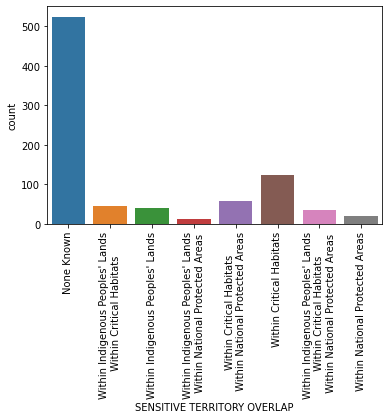

In [33]:
plt.xticks(rotation=90)
sns.countplot('SENSITIVE TERRITORY OVERLAP',data=df)

In [34]:
# countries
df['Country'].unique()

array(['Angola', 'Brazil', 'Suriname', 'Cambodia', 'Kenya',
       'Congo, Democratic Republic of the', 'Laos', 'Bangladesh',
       'Nigeria', 'Benin', 'Zambia', 'Bahamas', "Cote d'Ivoire",
       'Ethiopia', 'Djibouti', 'Indonesia', 'Togo', 'Philippines',
       'Myanmar', 'Mozambique', 'Eritrea', 'Ukraine', 'South Sudan',
       'Sudan', 'Kyrgyz Republic', 'Uzbekistan', 'Ecuador', 'Mauritania',
       'Kazakhstan', 'Jordan', 'Niger', 'Mauritius', 'Pakistan', 'Mali',
       'Hungary', 'Serbia', 'Belarus', 'Morocco', 'Regional', 'Malawi',
       'Egypt', 'Tanzania', 'Congo, Republic of the', 'Fiji', 'Nepal',
       'Rwanda', 'Ghana', 'Senegal', 'Sri Lanka', 'Argentina', 'Guyana',
       'Trinidad and Tobago', 'Maldives', 'Bolivia', 'Vietnam', 'Gabon',
       'Montenegro', 'Papua New Guinea', 'Samoa', 'Iran', 'Cameroon',
       'Venezuela', 'Timor-Leste', 'Peru', 'Tajikistan', 'Malaysia',
       'Dominican Republic', 'Uganda', 'Russian Federation', 'Madagascar',
       'Turkmenistan', 

In [35]:
len(df['Country'].unique()) # total number of Countries (the borrower work)

94

China loans for 94 countries organization

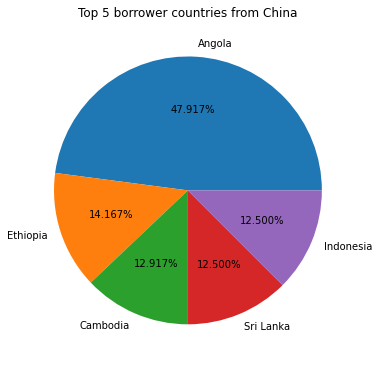

In [36]:
plt.figure(figsize=(6,7))
plt.pie(df['Country'].value_counts().head(),labels=df['Country'].value_counts().head().index,autopct=lambda x:f"{x:.3f}%")
plt.title('Top 5 borrower countries from China')
plt.show()

observation:
1. ANGOLA's organizations are the first leading country by borrowing from China

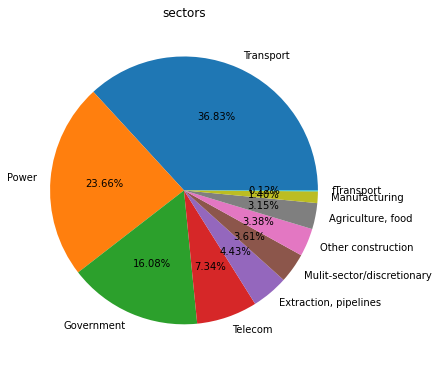

In [37]:
plt.figure(figsize=(6,7))
plt.pie(df['SECTOR'].value_counts(),labels=df['SECTOR'].value_counts().index,autopct=lambda x:f"{x:.2f}%")
plt.title('sectors')
plt.show()

observation:
1. most China's borrower borrow for transport, power, government

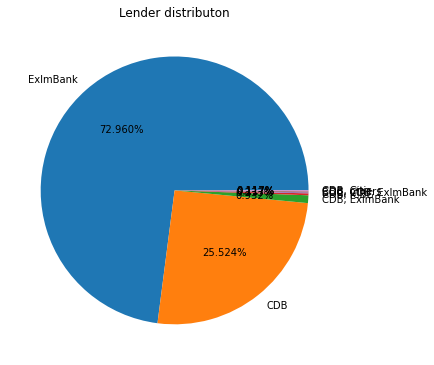

In [38]:
plt.figure(figsize=(6,7))
plt.pie(df['LENDER'].value_counts(),labels=df['LENDER'].value_counts().index,autopct=lambda x:f"{x:.3f}%")
plt.title('Lender distributon')
plt.show()

1. the popular lenders are ExlmBand and CDB

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Expand All | Collapse All    858 non-null    object 
 1   YEAR                         858 non-null    int64  
 2   LENDER                       858 non-null    object 
 3   BORROWER                     858 non-null    object 
 4   SECTOR                       858 non-null    object 
 5   SENSITIVE TERRITORY OVERLAP  858 non-null    object 
 6   Country                      858 non-null    object 
 7   amount in lakh ($)           858 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 53.8+ KB


In [40]:
df.nunique()

Expand All | Collapse All      828
YEAR                            12
LENDER                           7
BORROWER                       120
SECTOR                          10
SENSITIVE TERRITORY OVERLAP      8
Country                         94
amount in lakh ($)             346
dtype: int64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SECTOR', ylabel='count'>

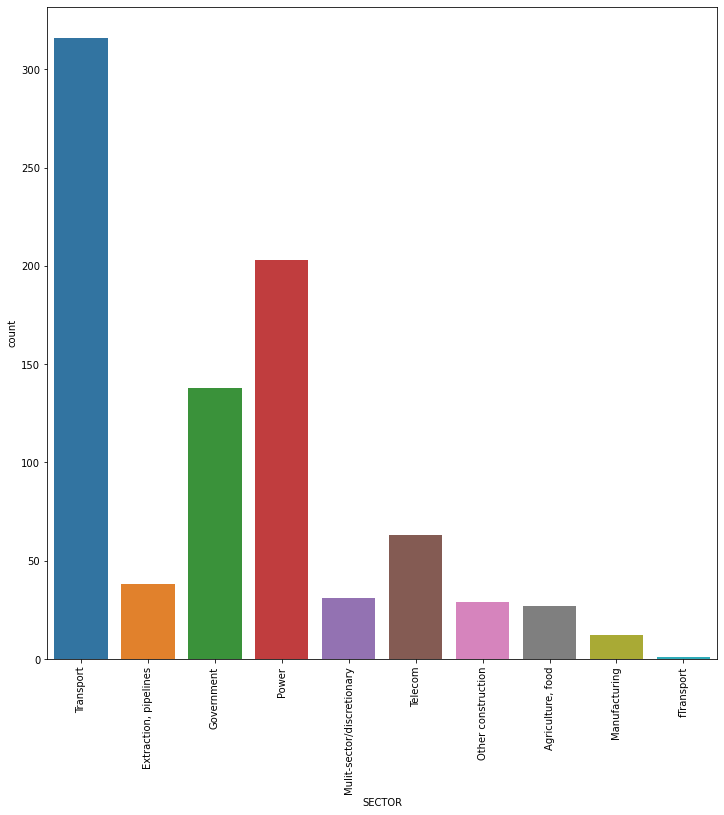

In [41]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.countplot('SECTOR',data=df)

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SECTOR', ylabel='count'>

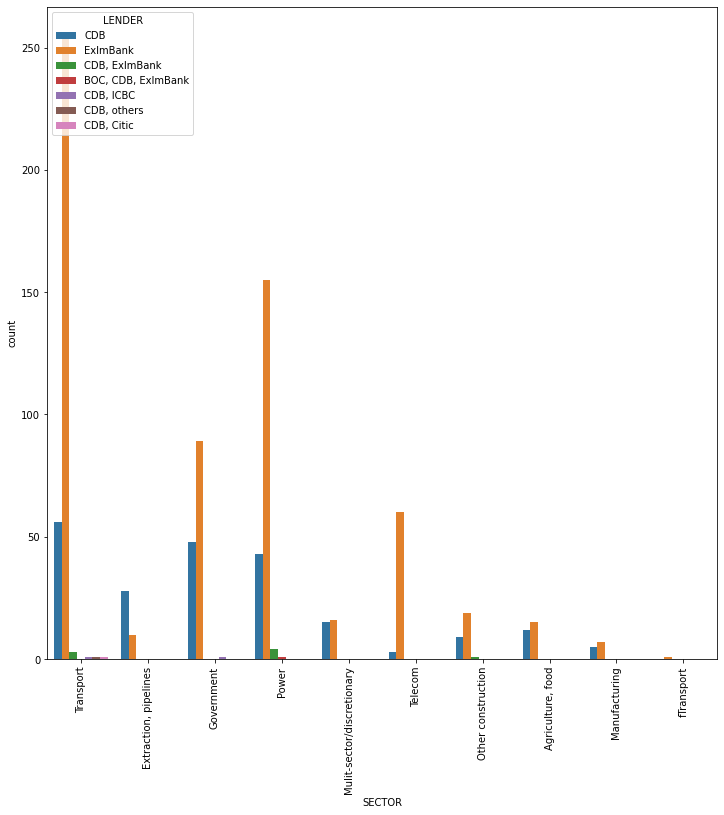

In [42]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.countplot('SECTOR',data=df,hue='LENDER')

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LENDER', ylabel='count'>

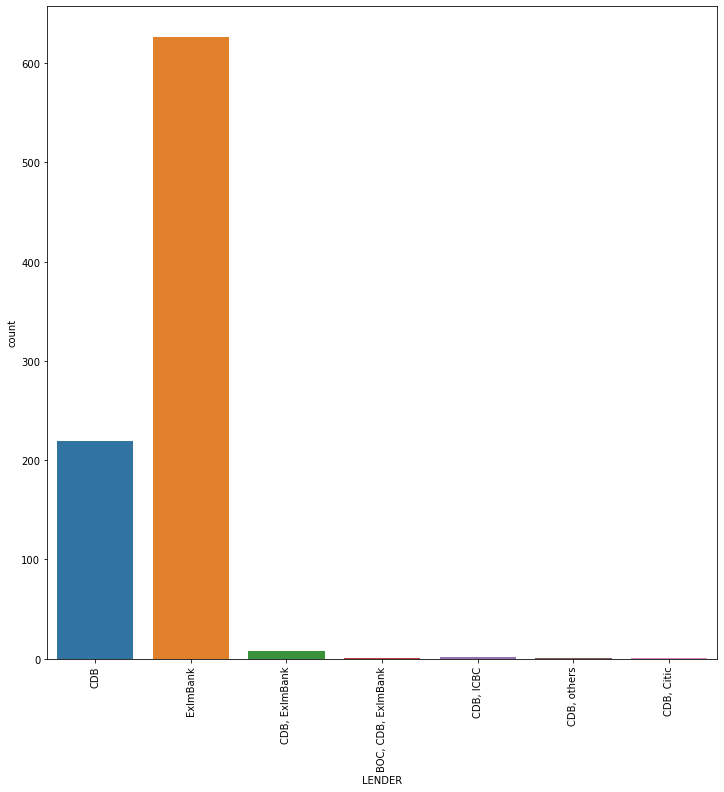

In [43]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.countplot('LENDER',data=df)

In [44]:
df.nunique()

Expand All | Collapse All      828
YEAR                            12
LENDER                           7
BORROWER                       120
SECTOR                          10
SENSITIVE TERRITORY OVERLAP      8
Country                         94
amount in lakh ($)             346
dtype: int64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YEAR', ylabel='count'>

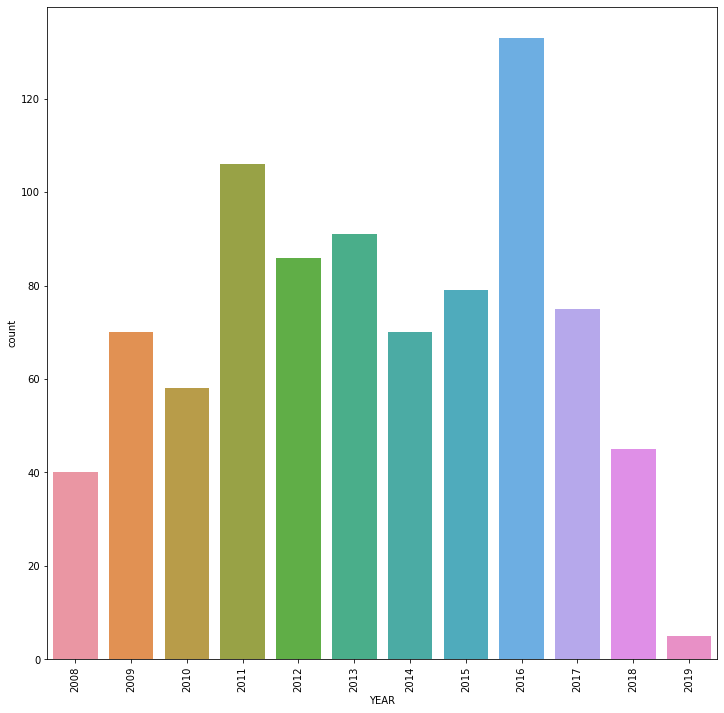

In [45]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.countplot('YEAR',data=df)

In [46]:
df.columns

Index(['Expand All | Collapse All', 'YEAR', 'LENDER', 'BORROWER', 'SECTOR',
       'SENSITIVE TERRITORY OVERLAP', 'Country', 'amount in lakh ($)'],
      dtype='object')

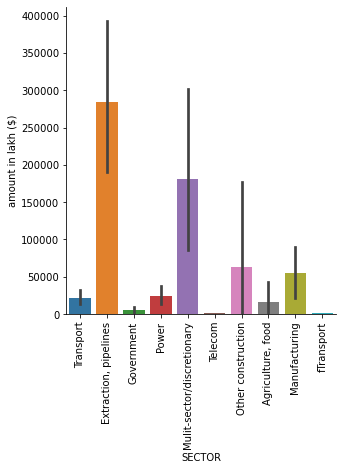

In [47]:
sns.catplot(x='SECTOR',y='amount in lakh ($)',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

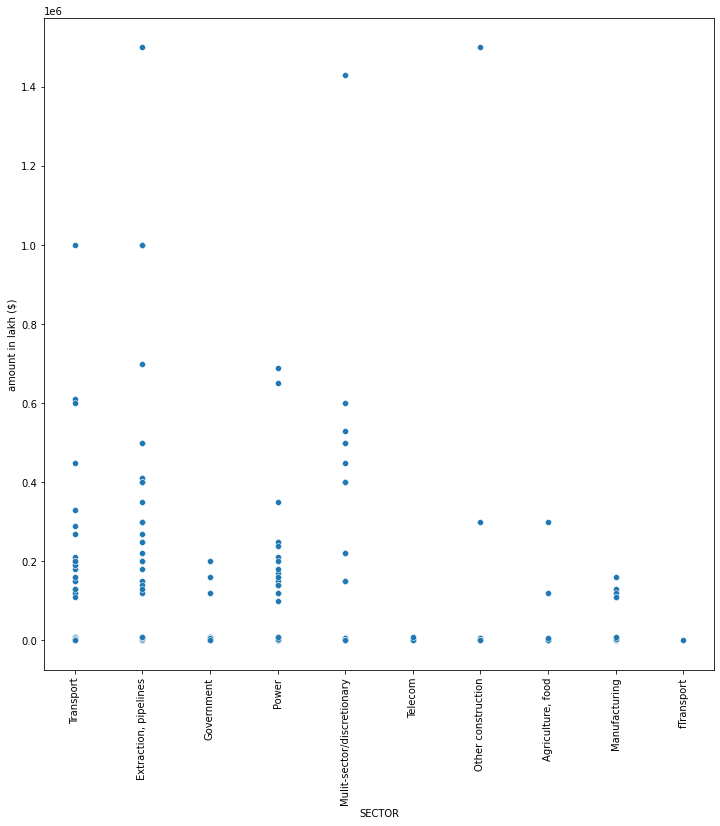

In [48]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='SECTOR',y='amount in lakh ($)',data=df)
plt.xticks(rotation=90)
plt.show()

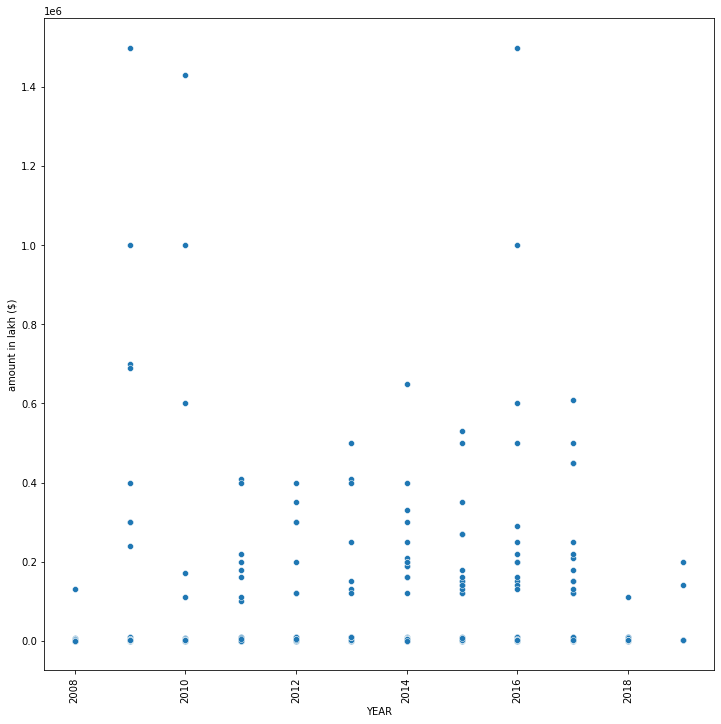

In [49]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='YEAR',y='amount in lakh ($)',data=df)
plt.xticks(rotation=90)
plt.show()

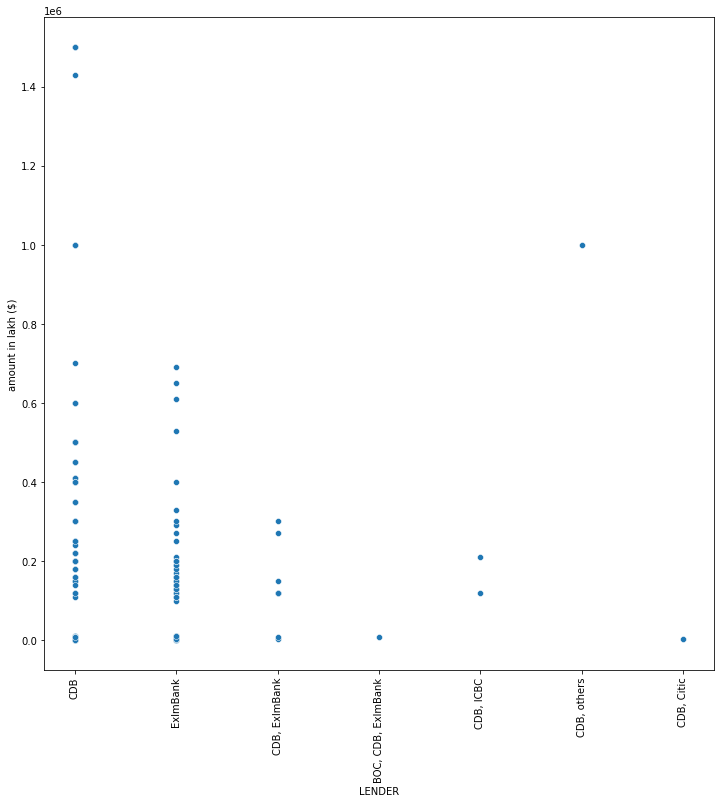

In [50]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='LENDER',y='amount in lakh ($)',data=df)
plt.xticks(rotation=90)
plt.show()

In [51]:
# average lent amount
df['amount in lakh ($)'].mean()*10000#we multiply be 10000 becuase the amount is in lakh

371648834.4988345

In [52]:
# total lent amount
df['amount in lakh ($)'].sum()*10000 #we multiply be 10000 becuase the amount is in lakh

318874700000.0

In [53]:
# group the dataset based on country
total_country=df[['amount in lakh ($)','Country']].groupby('Country').sum()
total_country.sort_values('amount in lakh ($)',ascending=False)

,amount in lakh ($)
Country,
Venezuela,5540910.0
Pakistan,3566530.0
Russian Federation,3529450.0
Brazil,2756560.0
Angola,1979400.0
...,...
Peru,500.0
Timor-Leste,500.0
Liberia,500.0


In [55]:
# total lent amount for Ethiopia
total_country[total_country.index=='Ethiopia']

,amount in lakh ($)
Country,
Ethiopia,199910.0


In [56]:
df.columns

Index(['Expand All | Collapse All', 'YEAR', 'LENDER', 'BORROWER', 'SECTOR',
       'SENSITIVE TERRITORY OVERLAP', 'Country', 'amount in lakh ($)'],
      dtype='object')

In [57]:
# group the dataset based on lender
lender=df[['amount in lakh ($)','LENDER']].groupby('LENDER').sum()
lender.sort_values('amount in lakh ($)',ascending=False)

,amount in lakh ($)
LENDER,
CDB,19859250.0
ExImBank,9597090.0
"CDB, ExImBank",1091500.0
"CDB, others",1000000.0
"CDB, ICBC",330000.0
"BOC, CDB, ExImBank",6900.0
"CDB, Citic",2730.0


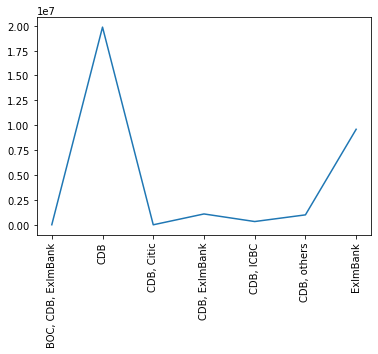

In [58]:
plt.plot(lender.index,lender['amount in lakh ($)'])
plt.xticks(rotation=90)
plt.show()

In [59]:
# group the dataset based on country
total_year=df[['amount in lakh ($)','YEAR']].groupby('YEAR').sum()
total_year.sort_values('amount in lakh ($)',ascending=False)

,amount in lakh ($)
YEAR,
2016,5556010.0
2009,5246000.0
2017,3678410.0
2015,3661040.0
2014,3507910.0
2010,3391350.0
2013,2182520.0
2012,1959860.0
2011,1941490.0


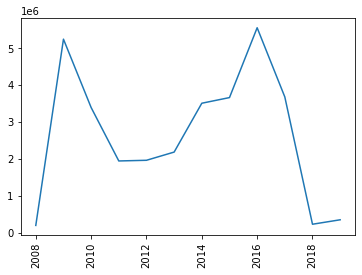

In [60]:
plt.plot(total_year.index,total_year['amount in lakh ($)'])
plt.xticks(rotation=90)
plt.show()

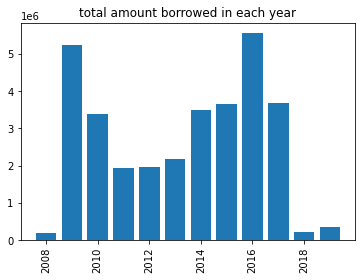

In [61]:
plt.bar(total_year.index,total_year['amount in lakh ($)'])
plt.title('total amount borrowed in each year')
plt.xticks(rotation=90)
plt.show()

In [62]:
# analysis lent of Ethiopia
ethio=df[df['Country']=='Ethiopia']
ethio

,Expand All | Collapse All,YEAR,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,amount in lakh ($)
29,Adama Wind Farm I (51MW),2010,ExImBank,Government,Power,Within Indigenous Peoples' Lands,Ethiopia,990.0
30,Adama Wind Farm II (153 MW),2013,ExImBank,Government,Power,Within Indigenous Peoples' Lands,Ethiopia,2930.0
31,Addis Ababa Deep Well Water Supply Project III,2011,ExImBank,Government,Government,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,960.0
32,Addis Ababa Power Network Rehabilitation and U...,2016,ExImBank,Government,Power,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,1650.0
33,Addis Ababa Transmission Lines,2017,ExImBank,Government,Power,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,830.0
34,Addis-Ababa Light Rail Project,2011,ExImBank,Government,Transport,Within Indigenous Peoples' Lands,Ethiopia,4750.0
35,Addis-Adama Expressway Construction (Phase 2),2016,ExImBank,Government,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,1900.0
36,Addis-Adama Expressway Construction (Phase I),2009,ExImBank,Government,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,3490.0
37,Addis-Adama Expressway- Toll Montovay Construc...,2013,ExImBank,Government,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,1430.0
38,Addis-Djibouti Railway (Tranche A),2013,ExImBank,Government,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Ethiopia,2200.0


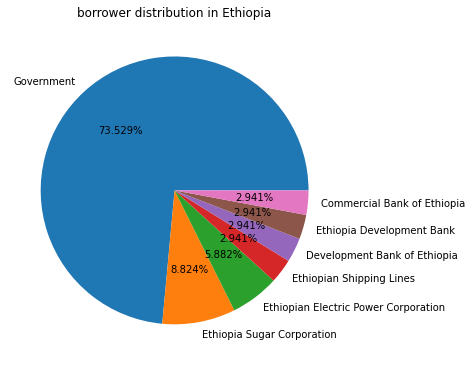

In [63]:
plt.figure(figsize=(6,7))
plt.pie(ethio['BORROWER'].value_counts(),labels=ethio['BORROWER'].value_counts().index,autopct=lambda x:f"{x:.3f}%")
plt.title('borrower distribution in Ethiopia')
plt.show()

obseravation:
1. mostly in Ethiopia the borrower is Government (around 73.529%)

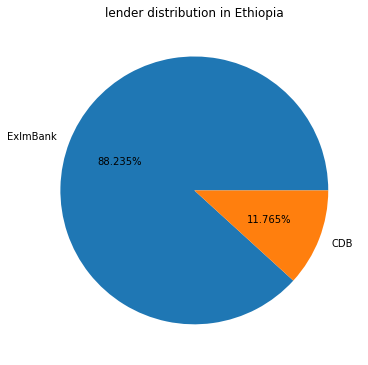

In [64]:
plt.figure(figsize=(6,7))
plt.pie(ethio['LENDER'].value_counts(),labels=ethio['LENDER'].value_counts().index,autopct=lambda x:f"{x:.3f}%")
plt.title('lender distribution in Ethiopia')
plt.show()

observation:
1. ExlmBank and CDB are the only lender for Ethiopia. but ExlmBank is the leader

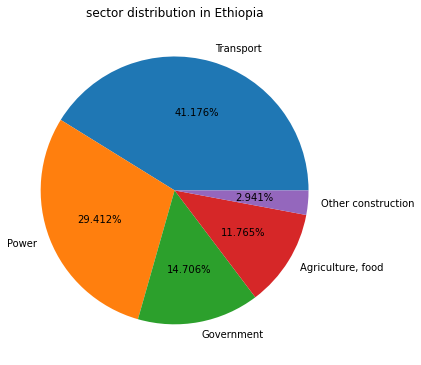

In [65]:
plt.figure(figsize=(6,7))
plt.pie(ethio['SECTOR'].value_counts(),labels=ethio['SECTOR'].value_counts().index,autopct=lambda x:f"{x:.3f}%")
plt.title('sector distribution in Ethiopia')
plt.show()

observation:
1. Ethiopia borrows mostly for transport sector

In [66]:
# total borrowed amount
ethio['amount in lakh ($)'].sum()*10000

1999100000.0

In [67]:
ethio[['amount in lakh ($)','SECTOR']].groupby('SECTOR').sum().sort_values('amount in lakh ($)',ascending=False)

,amount in lakh ($)
SECTOR,
Transport,164800.0
Power,17180.0
"Agriculture, food",12030.0
Government,3280.0
Other construction,2620.0


In [68]:
ethio_year=ethio[['amount in lakh ($)','YEAR']].groupby('YEAR').sum()
ethio_year

,amount in lakh ($)
YEAR,
2009,6190.0
2010,1250.0
2011,11530.0
2012,1480.0
2013,154810.0
2014,6870.0
2015,630.0
2016,8240.0
2017,7350.0


<AxesSubplot:xlabel='YEAR'>

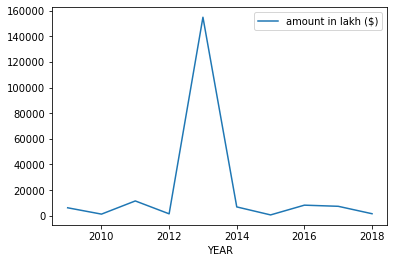

In [69]:
ethio_year.plot()

Ethiopia never borrows amount that exceed 2013's amount before and after 2013. it was around 150000Lakh

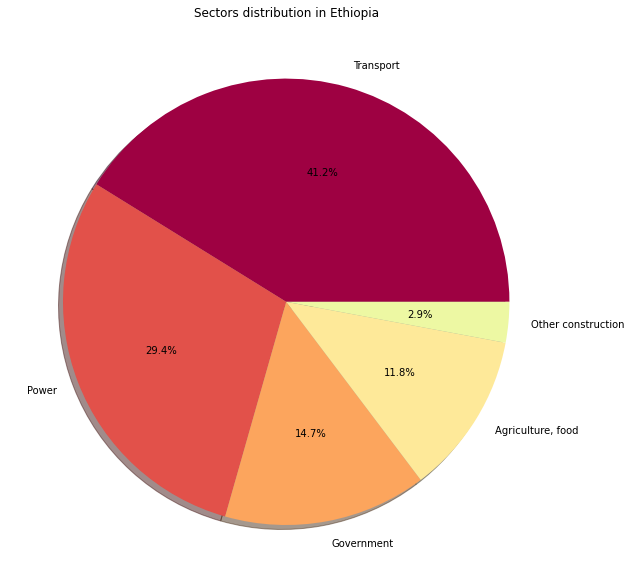

In [70]:
plt.figure(1, figsize=(10,20))
#the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot( aspect=1, title='Sectors distribution in Ethiopia')
type_show_ids = plt.pie(ethio['SECTOR'].value_counts(),labels=ethio['SECTOR'].value_counts().index, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [71]:
table=pd.pivot_table(data=ethio,index=['YEAR','SECTOR'])
table

amount in lakh ($)
YEAR SECTOR                                
2009 Power                      2700.000000
     Transport                  3490.000000
2010 Government                  260.000000
     Power                       990.000000
2011 Government                  960.000000
     Power                      1385.000000
     Transport                  2600.000000
2012 Agriculture, food          1230.000000
     Government                  250.000000
2013 Agriculture, food          2900.000000
     Government                  250.000000
     Power                      2930.000000
     Transport                 29166.000000
2014 Agriculture, food          5000.000000
     Transport                  1870.000000
2015 Power                       630.000000
2016 Power                      2070.000000
     Transport                  1366.666667
2017 Other construction         2620.000000
     Power                      1510.000000
     Transport                  1710.000000
2018 Government                 1560.000000

In [72]:
table2=pd.pivot_table(data=df,index=['YEAR','SECTOR'],values=['amount in lakh ($)'])
table2

amount in lakh ($)
YEAR SECTOR                                        
2008 Agriculture, food                   290.000000
     Extraction, pipelines              4290.000000
     Government                          560.000000
     Manufacturing                    130000.000000
     Mulit-sector/discretionary         2825.000000
...                                             ...
2018 Telecom                            1723.333333
     Transport                          7024.500000
2019 Mulit-sector/discretionary         1040.000000
     Power                            170000.000000
     Transport                          2180.000000

[91 rows x 1 columns]

In [73]:
df[['amount in lakh ($)','YEAR','SECTOR']].groupby(['YEAR','SECTOR']).sum()

amount in lakh ($)
YEAR SECTOR                                        
2008 Agriculture, food                        290.0
     Extraction, pipelines                   4290.0
     Government                              2240.0
     Manufacturing                         130000.0
     Mulit-sector/discretionary              5650.0
...                                             ...
2018 Telecom                                 5170.0
     Transport                             140490.0
2019 Mulit-sector/discretionary              1040.0
     Power                                 340000.0
     Transport                               4360.0

[91 rows x 1 columns]